In [1]:
import glob as glob
import pandas as pd
import pickle
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("notebook")
# sns.set_style("darkgrid")
%load_ext lab_black

In [2]:
samples = sorted(
    list(
        set(
            [
                x.split("/")[-1].split(".")[0]
                for x in sorted(
                    glob.glob("../1_data_repository/fixedcells_fragments/*")
                )
            ]
        )
    )
)
samples

['BIO_ddseq_1',
 'BIO_ddseq_2',
 'BIO_ddseq_3',
 'BIO_ddseq_4',
 'BRO_mtscatac_1',
 'BRO_mtscatac_2',
 'CNA_10xmultiome_1',
 'CNA_10xmultiome_2',
 'CNA_10xv11_1',
 'CNA_10xv11_2',
 'CNA_10xv11_3',
 'CNA_10xv11_4',
 'CNA_10xv11_5',
 'CNA_10xv2_1',
 'CNA_10xv2_2',
 'CNA_hydrop_1',
 'CNA_hydrop_2',
 'CNA_hydrop_3',
 'CNA_mtscatac_1',
 'CNA_mtscatac_2',
 'EPF_hydrop_1',
 'EPF_hydrop_2',
 'EPF_hydrop_3',
 'EPF_hydrop_4',
 'HAR_ddseq_1',
 'HAR_ddseq_2',
 'MDC_mtscatac_1',
 'MDC_mtscatac_2',
 'OHS_s3atac_1',
 'OHS_s3atac_2',
 'SAN_10xmultiome_1',
 'SAN_10xmultiome_2',
 'STA_10xv11_1',
 'STA_10xv11_2',
 'TXG_10xv11_1',
 'TXG_10xv2_1',
 'TXG_10xv2_2',
 'UCS_ddseq_1',
 'UCS_ddseq_2',
 'VIB_10xmultiome_1',
 'VIB_10xmultiome_2',
 'VIB_10xv1_1',
 'VIB_10xv1_2',
 'VIB_10xv2_1',
 'VIB_10xv2_2',
 'VIB_hydrop_1',
 'VIB_hydrop_11',
 'VIB_hydrop_12',
 'VIB_hydrop_2',
 'VIB_hydrop_21',
 'VIB_hydrop_22',
 'md5sum']

In [3]:
samples = [
    x
    for x in samples
    if x not in ["VIB_hydrop_11", "VIB_hydrop_12", "VIB_hydrop_21", "VIB_hydrop_22"]
]

In [4]:
len(samples)

48

In [5]:
samples = [
    "BIO_ddseq_1",
    "BIO_ddseq_2",
    "BIO_ddseq_3",
    "BIO_ddseq_4",
    "BRO_mtscatac_1",
    "BRO_mtscatac_2",
    "CNA_10xmultiome_1",
    "CNA_10xmultiome_2",
    "CNA_10xv11_1",
    "CNA_10xv11_2",
    "CNA_10xv11_3",
    "CNA_10xv11_4",
    "CNA_10xv11_5",
    "CNA_10xv2_1",
    "CNA_10xv2_2",
    "CNA_hydrop_1",
    "CNA_hydrop_2",
    "CNA_hydrop_3",
    "CNA_mtscatac_1",
    "CNA_mtscatac_2",
    "EPF_hydrop_1",
    "EPF_hydrop_2",
    "EPF_hydrop_3",
    "EPF_hydrop_4",
    "HAR_ddseq_1",
    "HAR_ddseq_2",
    "MDC_mtscatac_1",
    "MDC_mtscatac_2",
    "OHS_s3atac_1",
    "OHS_s3atac_2",
    "SAN_10xmultiome_1",
    "SAN_10xmultiome_2",
    "STA_10xv11_1",
    "STA_10xv11_2",
    "TXG_10xv11_1",
    "TXG_10xv2_1",
    "TXG_10xv2_2",
    "UCS_ddseq_1",
    "UCS_ddseq_2",
    "VIB_10xmultiome_1",
    "VIB_10xmultiome_2",
    "VIB_10xv1_1",
    "VIB_10xv1_2",
    "VIB_10xv2_1",
    "VIB_10xv2_2",
    "VIB_hydrop_1",
    "VIB_hydrop_2",
]

In [6]:
techs = sorted(list(set([x.split("_")[1] for x in samples])))
techs

['10xmultiome',
 '10xv1',
 '10xv11',
 '10xv2',
 'ddseq',
 'hydrop',
 'mtscatac',
 's3atac']

In [7]:
samples_tech_dict = {x: x.split("_")[1] for x in samples}
samples_tech_dict

{'BIO_ddseq_1': 'ddseq',
 'BIO_ddseq_2': 'ddseq',
 'BIO_ddseq_3': 'ddseq',
 'BIO_ddseq_4': 'ddseq',
 'BRO_mtscatac_1': 'mtscatac',
 'BRO_mtscatac_2': 'mtscatac',
 'CNA_10xmultiome_1': '10xmultiome',
 'CNA_10xmultiome_2': '10xmultiome',
 'CNA_10xv11_1': '10xv11',
 'CNA_10xv11_2': '10xv11',
 'CNA_10xv11_3': '10xv11',
 'CNA_10xv11_4': '10xv11',
 'CNA_10xv11_5': '10xv11',
 'CNA_10xv2_1': '10xv2',
 'CNA_10xv2_2': '10xv2',
 'CNA_hydrop_1': 'hydrop',
 'CNA_hydrop_2': 'hydrop',
 'CNA_hydrop_3': 'hydrop',
 'CNA_mtscatac_1': 'mtscatac',
 'CNA_mtscatac_2': 'mtscatac',
 'EPF_hydrop_1': 'hydrop',
 'EPF_hydrop_2': 'hydrop',
 'EPF_hydrop_3': 'hydrop',
 'EPF_hydrop_4': 'hydrop',
 'HAR_ddseq_1': 'ddseq',
 'HAR_ddseq_2': 'ddseq',
 'MDC_mtscatac_1': 'mtscatac',
 'MDC_mtscatac_2': 'mtscatac',
 'OHS_s3atac_1': 's3atac',
 'OHS_s3atac_2': 's3atac',
 'SAN_10xmultiome_1': '10xmultiome',
 'SAN_10xmultiome_2': '10xmultiome',
 'STA_10xv11_1': '10xv11',
 'STA_10xv11_2': '10xv11',
 'TXG_10xv11_1': '10xv11',
 'TXG_1

In [8]:
samples_bytech = {}
for tech in techs:
    samples_in_tech = []
    for sample in samples:
        if samples_tech_dict[sample] == tech:
            samples_in_tech.append(sample)

    samples_bytech[tech] = samples_in_tech

In [9]:
samples_bytech

{'10xmultiome': ['CNA_10xmultiome_1',
  'CNA_10xmultiome_2',
  'SAN_10xmultiome_1',
  'SAN_10xmultiome_2',
  'VIB_10xmultiome_1',
  'VIB_10xmultiome_2'],
 '10xv1': ['VIB_10xv1_1', 'VIB_10xv1_2'],
 '10xv11': ['CNA_10xv11_1',
  'CNA_10xv11_2',
  'CNA_10xv11_3',
  'CNA_10xv11_4',
  'CNA_10xv11_5',
  'STA_10xv11_1',
  'STA_10xv11_2',
  'TXG_10xv11_1'],
 '10xv2': ['CNA_10xv2_1',
  'CNA_10xv2_2',
  'TXG_10xv2_1',
  'TXG_10xv2_2',
  'VIB_10xv2_1',
  'VIB_10xv2_2'],
 'ddseq': ['BIO_ddseq_1',
  'BIO_ddseq_2',
  'BIO_ddseq_3',
  'BIO_ddseq_4',
  'HAR_ddseq_1',
  'HAR_ddseq_2',
  'UCS_ddseq_1',
  'UCS_ddseq_2'],
 'hydrop': ['CNA_hydrop_1',
  'CNA_hydrop_2',
  'CNA_hydrop_3',
  'EPF_hydrop_1',
  'EPF_hydrop_2',
  'EPF_hydrop_3',
  'EPF_hydrop_4',
  'VIB_hydrop_1',
  'VIB_hydrop_2'],
 'mtscatac': ['BRO_mtscatac_1',
  'BRO_mtscatac_2',
  'CNA_mtscatac_1',
  'CNA_mtscatac_2',
  'MDC_mtscatac_1',
  'MDC_mtscatac_2'],
 's3atac': ['OHS_s3atac_1', 'OHS_s3atac_2']}

In [10]:
selected_barcodes_dict = {
    x.split("/")[-1].split(f".")[0]: x
    for x in sorted(glob.glob("selected_barcodes/*.pkl"))
}
selected_barcodes_dict

{'BIO_ddseq_1': 'selected_barcodes/BIO_ddseq_1.FULL_bc_passing_filters_otsu.pkl',
 'BIO_ddseq_2': 'selected_barcodes/BIO_ddseq_2.FULL_bc_passing_filters_otsu.pkl',
 'BIO_ddseq_3': 'selected_barcodes/BIO_ddseq_3.FULL_bc_passing_filters_otsu.pkl',
 'BIO_ddseq_4': 'selected_barcodes/BIO_ddseq_4.FULL_bc_passing_filters_otsu.pkl',
 'BRO_mtscatac_1': 'selected_barcodes/BRO_mtscatac_1.FULL_bc_passing_filters_otsu.pkl',
 'BRO_mtscatac_2': 'selected_barcodes/BRO_mtscatac_2.FULL_bc_passing_filters_otsu.pkl',
 'CNA_10xmultiome_1': 'selected_barcodes/CNA_10xmultiome_1.FULL_bc_passing_filters_otsu.pkl',
 'CNA_10xmultiome_2': 'selected_barcodes/CNA_10xmultiome_2.FULL_bc_passing_filters_otsu.pkl',
 'CNA_10xv11_1': 'selected_barcodes/CNA_10xv11_1.FULL_bc_passing_filters_otsu.pkl',
 'CNA_10xv11_2': 'selected_barcodes/CNA_10xv11_2.FULL_bc_passing_filters_otsu.pkl',
 'CNA_10xv11_3': 'selected_barcodes/CNA_10xv11_3.FULL_bc_passing_filters_otsu.pkl',
 'CNA_10xv11_4': 'selected_barcodes/CNA_10xv11_4.FULL_bc

In [11]:
write = True
for sample in samples:
    print(sample)
    metadata_list = sorted(
        glob.glob(f"*k/cistopic_qc_out_CONSENSUS/{sample}.*metadata_bc.pkl*")
    )
    with open(selected_barcodes_dict[sample], "rb") as f:
        selected_barcodes = pickle.load(f)
        print(f"\t{len(selected_barcodes)}")

    for file in metadata_list:
        depth = file.split("/")[0]
        selected_barcodes_depthadjusted = [
            x.replace("FULL", depth).replace("FIXEDCELLS", depth)
            for x in selected_barcodes
        ]
        print(f"\t{file}")
        with open(file, "rb") as f:
            metadata_df = pickle.load(f)
            metadata_df.index = [
                x.replace("FIXEDCELLS", "40k") for x in metadata_df.index
            ]
        try:
            metadata_df_sub = metadata_df.loc[selected_barcodes_depthadjusted]
            print(f"\t\t{len(metadata_df_sub)}")
            if write == True:
                metadata_df_sub.to_csv(
                    f"selected_barcodes_metadata/{sample}.{depth}__metadata.tsv",
                    sep="\t",
                )

        except:
            print(f"\t\terror!!!")

            selected_barcodes_depthadjusted = list(
                set(metadata_df.index).intersection(
                    set(selected_barcodes_depthadjusted)
                )
            )
            metadata_df_sub = metadata_df.loc[selected_barcodes_depthadjusted]
            print(f"\t\t{len(metadata_df_sub)}")
        if write == True:
            metadata_df_sub.to_csv(
                f"selected_barcodes_metadata/{sample}.{depth}__metadata.tsv", sep="\t"
            )

BIO_ddseq_1
	6360
	10k/cistopic_qc_out_CONSENSUS/BIO_ddseq_1.10k__metadata_bc.pkl
		6360
	15k/cistopic_qc_out_CONSENSUS/BIO_ddseq_1.15k__metadata_bc.pkl
		6360
	20k/cistopic_qc_out_CONSENSUS/BIO_ddseq_1.20k__metadata_bc.pkl
		6360
	25k/cistopic_qc_out_CONSENSUS/BIO_ddseq_1.25k__metadata_bc.pkl
		6360
	30k/cistopic_qc_out_CONSENSUS/BIO_ddseq_1.30k__metadata_bc.pkl
		6360
	35k/cistopic_qc_out_CONSENSUS/BIO_ddseq_1.35k__metadata_bc.pkl
		6360
	40k/cistopic_qc_out_CONSENSUS/BIO_ddseq_1.FIXEDCELLS__metadata_bc.pkl
		6360
	5k/cistopic_qc_out_CONSENSUS/BIO_ddseq_1.5k__metadata_bc.pkl
		6360
BIO_ddseq_2
	5160
	10k/cistopic_qc_out_CONSENSUS/BIO_ddseq_2.10k__metadata_bc.pkl
		5160
	15k/cistopic_qc_out_CONSENSUS/BIO_ddseq_2.15k__metadata_bc.pkl
		5160
	20k/cistopic_qc_out_CONSENSUS/BIO_ddseq_2.20k__metadata_bc.pkl
		5160
	25k/cistopic_qc_out_CONSENSUS/BIO_ddseq_2.25k__metadata_bc.pkl
		5160
	30k/cistopic_qc_out_CONSENSUS/BIO_ddseq_2.30k__metadata_bc.pkl
		5160
	35k/cistopic_qc_out_CONSENSUS/BIO_d

In [12]:
metadata_df_dict = {}
for sample in samples:
    print(sample)
    metadata_list = sorted(
        glob.glob(f"selected_barcodes_metadata/{sample}*metadata.tsv")
    )

    if not metadata_list == []:
        metadata_df = pd.DataFrame()
        for file in metadata_list:
            depth = file.split("/")[-1].split(".")[1].split("__")[0]

            metadata_df_selected_barcodes = pd.read_csv(file, sep="\t")
            metadata_df[depth] = metadata_df_selected_barcodes.median()

        # print(metadata_df)
        metadata_df = metadata_df.T
        metadata_df["depth"] = [
            int(x) for x in [x.replace("k", "") for x in metadata_df.index]
        ]
        metadata_df["sample"] = sample
        metadata_df_dict[sample] = metadata_df.loc[
            metadata_df.index[
                np.argsort(
                    [int(x) for x in [x.replace("k", "") for x in metadata_df.index]]
                )
            ]
        ]

BIO_ddseq_1
BIO_ddseq_2


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

BIO_ddseq_3


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

BIO_ddseq_4
BRO_mtscatac_1
BRO_mtscatac_2


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

CNA_10xmultiome_1
CNA_10xmultiome_2


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

CNA_10xv11_1
CNA_10xv11_2
CNA_10xv11_3


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

CNA_10xv11_4


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

CNA_10xv11_5
CNA_10xv2_1
CNA_10xv2_2


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

CNA_hydrop_1
CNA_hydrop_2
CNA_hydrop_3
CNA_mtscatac_1


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

CNA_mtscatac_2
EPF_hydrop_1
EPF_hydrop_2


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

EPF_hydrop_3
EPF_hydrop_4
HAR_ddseq_1


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

HAR_ddseq_2
MDC_mtscatac_1


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

MDC_mtscatac_2
OHS_s3atac_1


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

OHS_s3atac_2
SAN_10xmultiome_1
SAN_10xmultiome_2


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

STA_10xv11_1
STA_10xv11_2
TXG_10xv11_1


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

TXG_10xv2_1
TXG_10xv2_2


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

UCS_ddseq_1
UCS_ddseq_2


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

VIB_10xmultiome_1
VIB_10xmultiome_2
VIB_10xv1_1
VIB_10xv1_2


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

VIB_10xv2_1
VIB_10xv2_2
VIB_hydrop_1


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

VIB_hydrop_2


/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadata_df[depth] = metadata_df_selected_barcodes.median()
/tmp/ipykernel_972599/3217933311.py:14: FutureWarnin

In [13]:
variables = [
    "Log_total_nr_frag",
    "Log_unique_nr_frag",
    "Total_nr_frag",
    "Unique_nr_frag",
    "Dupl_nr_frag",
    "Dupl_rate",
    "Total_nr_frag_in_regions",
    "Unique_nr_frag_in_regions",
    "FRIP",
    "TSS_enrichment",
]

10xmultiome
['CNA_10xmultiome_1', 'CNA_10xmultiome_2', 'SAN_10xmultiome_1', 'SAN_10xmultiome_2', 'VIB_10xmultiome_1', 'VIB_10xmultiome_2']
10xv1
['VIB_10xv1_1', 'VIB_10xv1_2']
10xv11
['CNA_10xv11_1', 'CNA_10xv11_2', 'CNA_10xv11_3', 'CNA_10xv11_4', 'CNA_10xv11_5', 'STA_10xv11_1', 'STA_10xv11_2', 'TXG_10xv11_1']
10xv2
['CNA_10xv2_1', 'CNA_10xv2_2', 'TXG_10xv2_1', 'TXG_10xv2_2', 'VIB_10xv2_1', 'VIB_10xv2_2']
ddseq
['BIO_ddseq_1', 'BIO_ddseq_2', 'BIO_ddseq_3', 'BIO_ddseq_4', 'HAR_ddseq_1', 'HAR_ddseq_2', 'UCS_ddseq_1', 'UCS_ddseq_2']
hydrop
['CNA_hydrop_1', 'CNA_hydrop_2', 'CNA_hydrop_3', 'EPF_hydrop_1', 'EPF_hydrop_2', 'EPF_hydrop_3', 'EPF_hydrop_4', 'VIB_hydrop_1', 'VIB_hydrop_2']
mtscatac
['BRO_mtscatac_1', 'BRO_mtscatac_2', 'CNA_mtscatac_1', 'CNA_mtscatac_2', 'MDC_mtscatac_1', 'MDC_mtscatac_2']
s3atac
['OHS_s3atac_1', 'OHS_s3atac_2']


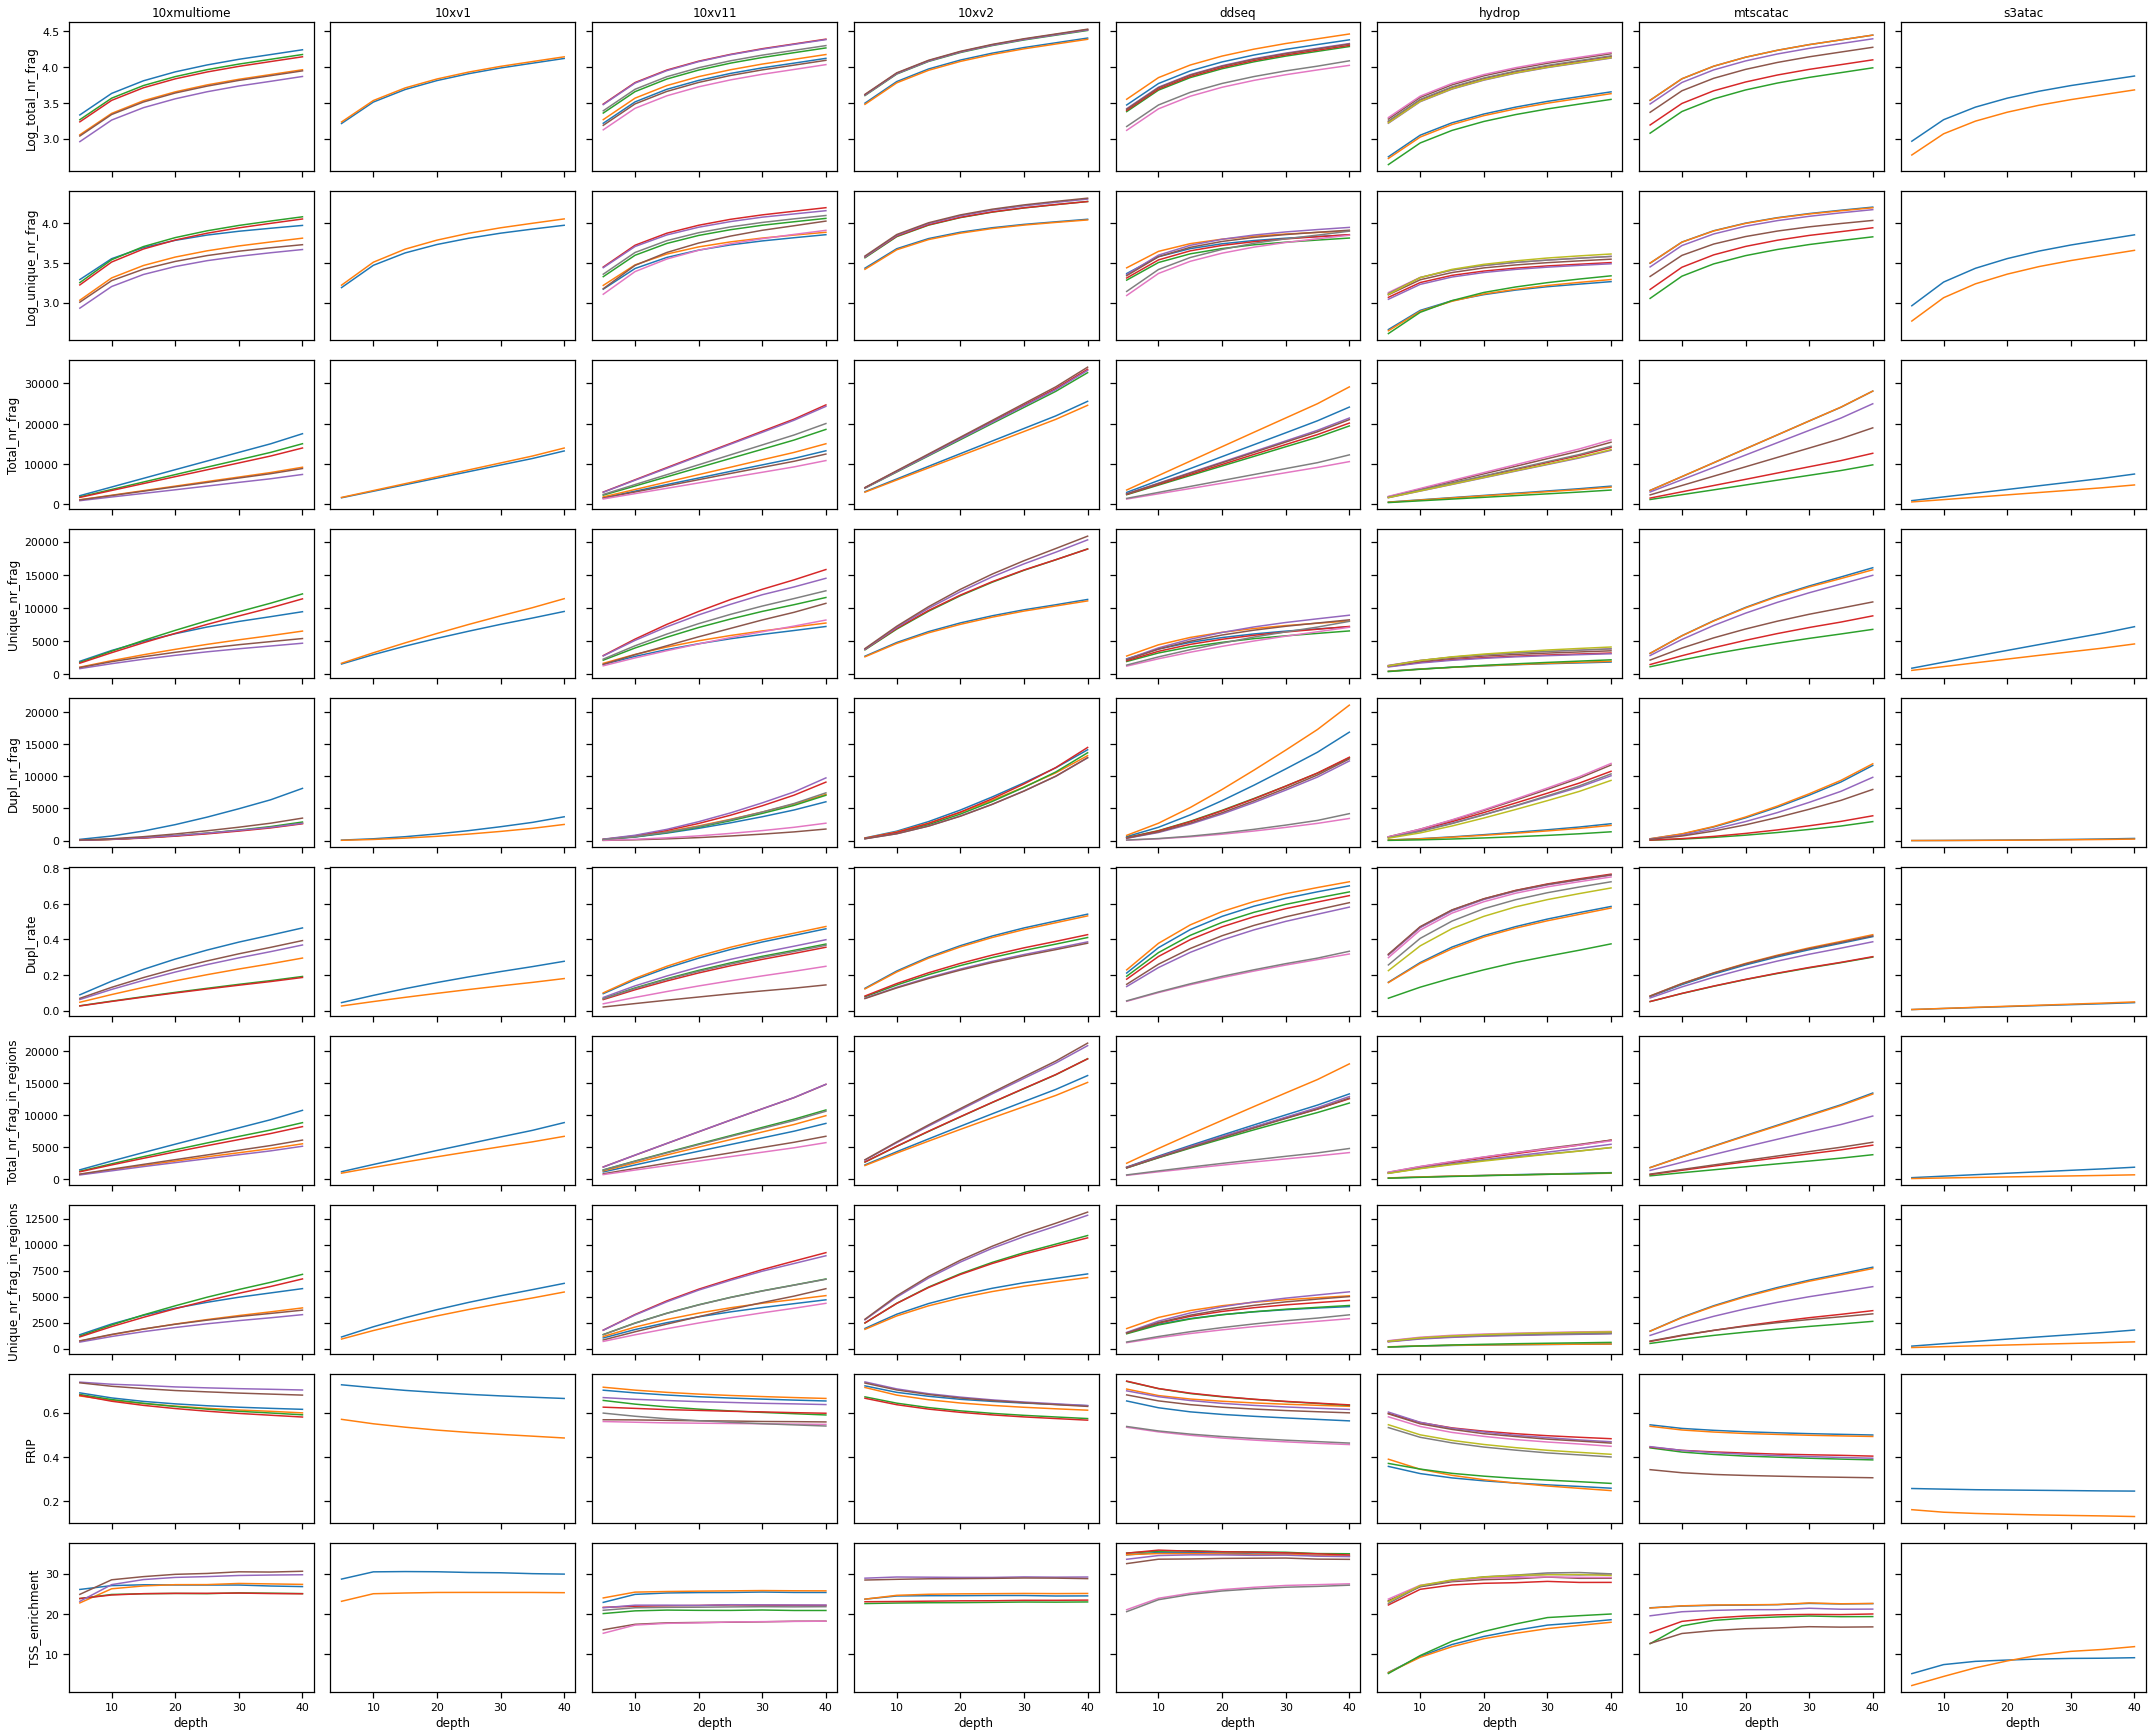

In [14]:
fig, axes = plt.subplots(
    len(variables),
    len(samples_bytech.keys()),
    figsize=(3 * len(variables), 3 * len(samples_bytech.keys())),
    sharex="col",
    sharey="row",
)

for tech in samples_bytech.keys():
    print(tech)

    samples_in_tech = samples_bytech[tech]
    print(samples_in_tech)
    for sample in samples_in_tech:
        if sample in metadata_df_dict.keys():
            metadata_df = metadata_df_dict[sample]
            for variable in variables:
                sns.lineplot(
                    data=metadata_df,
                    x="depth",
                    y=variable,
                    ax=axes[
                        variables.index(variable),
                        list(samples_bytech.keys()).index(tech),
                    ],
                )

plt.tight_layout()

for ax, tech in zip(axes[0], techs):
    ax.set_title(tech)

plt.savefig("plts/all_variables_massive.png", dpi=300, facecolor="w")
plt.show()

# Combined figure

In [15]:
metadata_df_combined = pd.DataFrame()
for sample in metadata_df_dict.keys():
    metadata_df = metadata_df_dict[sample][:]
    metadata_df.index = [x + f"__{sample}" for x in metadata_df.index]
    metadata_df_combined = pd.concat([metadata_df_combined, metadata_df])

metadata_df_combined["tech"] = [x.split("_")[1] for x in metadata_df_combined["sample"]]

In [16]:
for sample in samples:
    print(sample)
    metadata_list = sorted(
        glob.glob(f"*k/*k_preprocessing_out/data/reports/barcode/{sample}*log")
    )
    for file in metadata_list:
        print(f"\t{file}")
        depth = file.split("/")[0]
        depth_sample = f"{str(depth)}__{sample}"

        mapping_stats_df = pd.read_csv(file, sep="\t", header=None, on_bad_lines="skip")
        mapping_stats_df = mapping_stats_df.set_index(0)
        n_reads = mapping_stats_df.loc["nbr_reads:"][1]

        tech = sample.split("_")[1]
        if tech == "ddseq":
            total_bc_found = mapping_stats_df.loc[
                "nbr_reads_with_bc1_bc2_bc3_correct_or_correctable"
            ][1]
        else:
            total_bc_found = mapping_stats_df.loc["total_bc_found"][1]

        metadata_df_combined.at[depth_sample, "n_reads"] = n_reads
        metadata_df_combined.at[depth_sample, "total_bc_found"] = total_bc_found

metadata_df_combined["%_barcodes"] = (
    metadata_df_combined["total_bc_found"] / metadata_df_combined["n_reads"] * 100
)

BIO_ddseq_1
	10k/10k_preprocessing_out/data/reports/barcode/BIO_ddseq_1.10k___BIO_ddseq_1__R1.corrected.bc_stats.log
	15k/15k_preprocessing_out/data/reports/barcode/BIO_ddseq_1.15k___BIO_ddseq_1__R1.corrected.bc_stats.log
	20k/20k_preprocessing_out/data/reports/barcode/BIO_ddseq_1.20k___BIO_ddseq_1__R1.corrected.bc_stats.log
	25k/25k_preprocessing_out/data/reports/barcode/BIO_ddseq_1.25k___BIO_ddseq_1__R1.corrected.bc_stats.log
	30k/30k_preprocessing_out/data/reports/barcode/BIO_ddseq_1.30k___BIO_ddseq_1__R1.corrected.bc_stats.log
	35k/35k_preprocessing_out/data/reports/barcode/BIO_ddseq_1.35k___BIO_ddseq_1__R1.corrected.bc_stats.log
	40k/40k_preprocessing_out/data/reports/barcode/BIO_ddseq_1_____R1.corrected.bc_stats.log
	5k/5k_preprocessing_out/data/reports/barcode/BIO_ddseq_1.5k___BIO_ddseq_1__R1.corrected.bc_stats.log
BIO_ddseq_2
	10k/10k_preprocessing_out/data/reports/barcode/BIO_ddseq_2.10k___BIO_ddseq_2__R1.corrected.bc_stats.log
	15k/15k_preprocessing_out/data/reports/barcode/B

In [17]:
for sample in samples:
    print(sample)
    metadata_list = sorted(
        glob.glob(
            f"*k/*k_preprocessing_out/data/reports/mapping_stats/{sample}*mapping_stats.tsv"
        )
    )
    for file in metadata_list:
        print(f"\t{file}")
        depth = file.split("/")[0]
        depth_sample = f"{str(depth)}__{sample}"

        mapping_stats_df = pd.read_csv(file, sep="\t", header=None)
        mapping_stats_df = mapping_stats_df.set_index(0)
        n_reads_into_bwa = mapping_stats_df.loc["raw total sequences:"][1]
        n_reads_q30 = mapping_stats_df.loc["Reads mapped with MAPQ>30:"][1]

        metadata_df_combined.at[depth_sample, "n_reads_into_bwa"] = int(
            n_reads_into_bwa
        )
        metadata_df_combined.at[depth_sample, "n_reads_q30"] = int(n_reads_q30)

metadata_df_combined["%_q30"] = (
    metadata_df_combined["n_reads_q30"] / metadata_df_combined["n_reads_into_bwa"] * 100
)

BIO_ddseq_1
	10k/10k_preprocessing_out/data/reports/mapping_stats/BIO_ddseq_1.10k___BIO_ddseq_1__R1.mapping_stats.tsv
	15k/15k_preprocessing_out/data/reports/mapping_stats/BIO_ddseq_1.15k___BIO_ddseq_1__R1.mapping_stats.tsv
	20k/20k_preprocessing_out/data/reports/mapping_stats/BIO_ddseq_1.20k___BIO_ddseq_1__R1.mapping_stats.tsv
	25k/25k_preprocessing_out/data/reports/mapping_stats/BIO_ddseq_1.25k___BIO_ddseq_1__R1.mapping_stats.tsv
	30k/30k_preprocessing_out/data/reports/mapping_stats/BIO_ddseq_1.30k___BIO_ddseq_1__R1.mapping_stats.tsv
	35k/35k_preprocessing_out/data/reports/mapping_stats/BIO_ddseq_1.35k___BIO_ddseq_1__R1.mapping_stats.tsv
	40k/40k_preprocessing_out/data/reports/mapping_stats/BIO_ddseq_1.40k___BIO_ddseq_1__R1.mapping_stats.tsv
	5k/5k_preprocessing_out/data/reports/mapping_stats/BIO_ddseq_1.5k___BIO_ddseq_1__R1.mapping_stats.tsv
BIO_ddseq_2
	10k/10k_preprocessing_out/data/reports/mapping_stats/BIO_ddseq_2.10k___BIO_ddseq_2__R1.mapping_stats.tsv
	15k/15k_preprocessing_ou

In [18]:
metadata_df_combined.columns

Index(['Log_total_nr_frag', 'Log_unique_nr_frag', 'Total_nr_frag',
       'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'depth', 'sample', 'tech', 'n_reads',
       'total_bc_found', '%_barcodes', 'n_reads_into_bwa', 'n_reads_q30',
       '%_q30'],
      dtype='object')

In [19]:
metadata_df_combined[metadata_df_combined["tech"] == "mtscatac"]["%_q30"]

5k__BRO_mtscatac_1     87.559475
10k__BRO_mtscatac_1    87.560594
15k__BRO_mtscatac_1    87.554187
20k__BRO_mtscatac_1    87.553765
25k__BRO_mtscatac_1    87.554355
30k__BRO_mtscatac_1    87.552276
35k__BRO_mtscatac_1    87.550939
40k__BRO_mtscatac_1    87.550607
5k__BRO_mtscatac_2     87.662742
10k__BRO_mtscatac_2    87.657286
15k__BRO_mtscatac_2    87.657801
20k__BRO_mtscatac_2    87.659624
25k__BRO_mtscatac_2    87.657687
30k__BRO_mtscatac_2    87.657600
35k__BRO_mtscatac_2    87.657421
40k__BRO_mtscatac_2    87.658115
5k__CNA_mtscatac_1     88.007004
10k__CNA_mtscatac_1    88.020187
15k__CNA_mtscatac_1    88.018782
20k__CNA_mtscatac_1    88.018854
25k__CNA_mtscatac_1    88.020417
30k__CNA_mtscatac_1    88.017834
35k__CNA_mtscatac_1    88.019510
40k__CNA_mtscatac_1    88.018593
5k__CNA_mtscatac_2     88.052181
10k__CNA_mtscatac_2    88.062221
15k__CNA_mtscatac_2    88.066794
20k__CNA_mtscatac_2    88.069395
25k__CNA_mtscatac_2    88.068187
30k__CNA_mtscatac_2    88.071132
35k__CNA_m

In [20]:
for sample in samples:
    print(sample)
    metadata_list = sorted(
        glob.glob(f"selected_barcodes_metadata/{sample}*metadata.tsv")
    )

    if not metadata_list == []:
        metadata_df = pd.DataFrame()
        for file in metadata_list:
            depth = file.split("/")[-1].split(".")[1].split("__")[0]

            metadata_df_selected_barcodes = pd.read_csv(file, sep="\t")
            total_unique_nr_frag_in_regions = metadata_df_selected_barcodes[
                "Unique_nr_frag_in_regions"
            ].sum()

            depth = file.split("/")[-1].split(".")[1].split("__")[0]
            depth_sample = f"{str(depth)}__{sample}"
            metadata_df_combined.at[
                depth_sample, "Total_unique_nr_frag_in_regions_in_cells"
            ] = int(total_unique_nr_frag_in_regions)

metadata_df_combined["%_unique_nr_frag_in_regions_in_cells"] = (
    metadata_df_combined["Total_unique_nr_frag_in_regions_in_cells"]
    / metadata_df_combined["n_reads"]
)

BIO_ddseq_1
BIO_ddseq_2
BIO_ddseq_3
BIO_ddseq_4
BRO_mtscatac_1
BRO_mtscatac_2
CNA_10xmultiome_1
CNA_10xmultiome_2
CNA_10xv11_1
CNA_10xv11_2
CNA_10xv11_3
CNA_10xv11_4
CNA_10xv11_5
CNA_10xv2_1
CNA_10xv2_2
CNA_hydrop_1
CNA_hydrop_2
CNA_hydrop_3
CNA_mtscatac_1
CNA_mtscatac_2
EPF_hydrop_1
EPF_hydrop_2
EPF_hydrop_3
EPF_hydrop_4
HAR_ddseq_1
HAR_ddseq_2
MDC_mtscatac_1
MDC_mtscatac_2
OHS_s3atac_1
OHS_s3atac_2
SAN_10xmultiome_1
SAN_10xmultiome_2
STA_10xv11_1
STA_10xv11_2
TXG_10xv11_1
TXG_10xv2_1
TXG_10xv2_2
UCS_ddseq_1
UCS_ddseq_2
VIB_10xmultiome_1
VIB_10xmultiome_2
VIB_10xv1_1
VIB_10xv1_2
VIB_10xv2_1
VIB_10xv2_2
VIB_hydrop_1
VIB_hydrop_2


# Add seurat values

In [21]:
for sample in samples:
    print(sample)
    metadata_list = sorted(
        glob.glob(f"*k/cell_type_classification/{sample}*seurat.txt")
    )
    for file in metadata_list:
        print(f"\t{file}")
        depth = file.split("/")[0]
        depth_sample = f"{str(depth)}__{sample}"

        seurat_stats_df = pd.read_csv(file, sep="\t", on_bad_lines="skip")
        metadata_df_combined.at[
            depth_sample, "median_cell_type_pred_score"
        ] = seurat_stats_df["cell_type_pred_score"].median()

BIO_ddseq_1
	10k/cell_type_classification/BIO_ddseq_1.10k__cell_type_seurat.txt
	15k/cell_type_classification/BIO_ddseq_1.15k__cell_type_seurat.txt
	20k/cell_type_classification/BIO_ddseq_1.20k__cell_type_seurat.txt
	25k/cell_type_classification/BIO_ddseq_1.25k__cell_type_seurat.txt
	30k/cell_type_classification/BIO_ddseq_1.30k__cell_type_seurat.txt
	35k/cell_type_classification/BIO_ddseq_1.35k__cell_type_seurat.txt
	40k/cell_type_classification/BIO_ddseq_1.FIXEDCELLS__cell_type_seurat.txt
	5k/cell_type_classification/BIO_ddseq_1.5k__cell_type_seurat.txt
BIO_ddseq_2
	10k/cell_type_classification/BIO_ddseq_2.10k__cell_type_seurat.txt
	15k/cell_type_classification/BIO_ddseq_2.15k__cell_type_seurat.txt
	20k/cell_type_classification/BIO_ddseq_2.20k__cell_type_seurat.txt
	25k/cell_type_classification/BIO_ddseq_2.25k__cell_type_seurat.txt
	30k/cell_type_classification/BIO_ddseq_2.30k__cell_type_seurat.txt
	35k/cell_type_classification/BIO_ddseq_2.35k__cell_type_seurat.txt
	40k/cell_type_clas

# add n_dars and dar strengths

In [22]:
df_n_dars = pd.read_csv("downstream_analysis/all_n_dars.csv", header=0, index_col=0)
df_n_dars

,sample,cell_type,n_dars,depth,depth_int,tech
0,BIO_ddseq_1.10k,B_cell,5280.0,10k,10,ddseq
1,BIO_ddseq_1.10k,CD14+_monocyte,12426.0,10k,10,ddseq
2,BIO_ddseq_1.10k,CD16+_monocyte,12454.0,10k,10,ddseq
3,BIO_ddseq_1.10k,CD4+_T_cell,2282.0,10k,10,ddseq
4,BIO_ddseq_1.10k,Cytotoxic_T_cell,1908.0,10k,10,ddseq
...,...,...,...,...,...,...
2376,HAR_ddseq_1.40k,Cytotoxic_T_cell,4640.0,40k,40,ddseq
2377,HAR_ddseq_1.40k,Dendritic_cell,14483.0,40k,40,ddseq
2378,HAR_ddseq_1.40k,Natural_killer_cell,5049.0,40k,40,ddseq
2379,OHS_s3atac_2.40k,B_cell,8616.0,40k,40,s3atac


In [23]:
for cell_type in df_n_dars["cell_type"].unique():
    print(cell_type)
    col = "n_dars__" + cell_type

    df_sub = df_n_dars[df_n_dars["cell_type"] == cell_type]
    df_sub.index = df_sub["depth"] + "__" + [x.split(".")[0] for x in df_sub["sample"]]
    metadata_df_combined[col] = df_sub["n_dars"] / 1000

B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell


In [24]:
df_logfc = pd.read_csv("downstream_analysis/all_dars_logfc.csv", header=0, index_col=0)
df_logfc

,sample,cell_type,logfc,depth,depth_int,tech
0,BIO_ddseq_1.10k,B_cell,2.521479,10k,10,ddseq
1,BIO_ddseq_1.10k,CD14+_monocyte,3.781484,10k,10,ddseq
2,BIO_ddseq_1.10k,CD16+_monocyte,2.380548,10k,10,ddseq
3,BIO_ddseq_1.10k,CD4+_T_cell,0.973905,10k,10,ddseq
4,BIO_ddseq_1.10k,Cytotoxic_T_cell,0.889941,10k,10,ddseq
...,...,...,...,...,...,...
2376,HAR_ddseq_1.40k,Cytotoxic_T_cell,1.571545,40k,40,ddseq
2377,HAR_ddseq_1.40k,Dendritic_cell,1.980295,40k,40,ddseq
2378,HAR_ddseq_1.40k,Natural_killer_cell,2.236170,40k,40,ddseq
2379,OHS_s3atac_2.40k,B_cell,0.792389,40k,40,s3atac


In [25]:
for cell_type in df_logfc["cell_type"].unique():
    print(cell_type)
    col = "logfc__" + cell_type

    df_sub = df_logfc[df_logfc["cell_type"] == cell_type]
    df_sub.index = df_sub["depth"] + "__" + [x.split(".")[0] for x in df_sub["sample"]]
    metadata_df_combined[col] = df_sub["logfc"]

    col = "fc__" + cell_type
    metadata_df_combined[col] = 2 ** df_sub["logfc"]

B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell


In [26]:
metadata_df_combined

,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,Total_nr_frag_in_regions,Unique_nr_frag_in_regions,FRIP,TSS_enrichment,...,logfc__CD16+_monocyte,fc__CD16+_monocyte,logfc__CD4+_T_cell,fc__CD4+_T_cell,logfc__Cytotoxic_T_cell,fc__Cytotoxic_T_cell,logfc__Dendritic_cell,fc__Dendritic_cell,logfc__Natural_killer_cell,fc__Natural_killer_cell
5k__BIO_ddseq_1,3.471072,3.367542,2958.5,2331.0,615.0,0.211254,1896.0,1495.0,0.652306,34.658296,...,2.424259,5.367532,1.267752,2.407861,0.728879,1.657351,1.954734,3.876444,1.600674,3.032849
10k__BIO_ddseq_1,3.771367,3.580298,5907.0,3804.5,2071.0,0.354052,3615.5,2341.0,0.621712,35.270389,...,2.380548,5.207345,0.973905,1.964149,0.889941,1.853100,2.082993,4.236853,2.043475,4.122373
15k__BIO_ddseq_1,3.948266,3.682100,8877.0,4809.5,4000.5,0.455827,5280.5,2890.0,0.603331,35.235894,...,2.403875,5.292227,1.515525,2.859029,1.134353,2.195200,2.107076,4.308173,1.875484,3.669247
20k__BIO_ddseq_1,4.073462,3.743314,11843.0,5537.5,6222.0,0.530244,6900.5,3269.0,0.591796,35.117437,...,2.387860,5.233806,1.548103,2.924324,1.203305,2.302666,2.140071,4.407838,2.020748,4.057942
25k__BIO_ddseq_1,4.170100,3.784118,14794.5,6083.0,8615.5,0.587349,8494.5,3538.5,0.583268,34.899511,...,2.381624,5.211229,1.337756,2.527579,1.169602,2.249496,2.067202,4.190732,1.968827,3.914498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20k__VIB_hydrop_2,3.823800,3.483659,6665.0,3045.5,3511.5,0.530173,2837.5,1342.0,0.456477,29.175848,...,0.987265,1.982423,1.126565,2.183382,1.092482,2.132405,0.996431,1.995058,1.050082,2.070648
25k__VIB_hydrop_2,3.920775,3.527565,8332.5,3369.5,4839.0,0.583522,3370.5,1437.5,0.442139,29.593899,...,1.051690,2.072956,0.800562,1.741779,1.609997,3.052513,1.197691,2.293722,1.114281,2.164871
30k__VIB_hydrop_2,3.998956,3.563422,9976.0,3659.5,6220.0,0.624473,3905.0,1507.0,0.430242,29.719750,...,1.459736,2.750580,1.416384,2.669157,1.552016,2.932267,1.031508,2.044160,1.230435,2.346377
35k__VIB_hydrop_2,4.066270,3.590173,11648.5,3892.0,7653.0,0.658220,4396.0,1560.0,0.421047,29.781440,...,1.345501,2.541184,1.564065,2.956858,1.208402,2.310815,1.276357,2.422265,1.129281,2.187496


In [27]:
variables = [
    "n_reads",
    "%_q30",
    "%_barcodes",
    "FRIP",
    "TSS_enrichment",
    "Unique_nr_frag_in_regions",
    "%_unique_nr_frag_in_regions_in_cells",
    "median_cell_type_pred_score",
]

In [28]:
import math

In [29]:
# sns.set_context("notebook")
# sns.set_style("darkgrid")

In [30]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xv11c": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "mtscatacfacs": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

In [31]:
var_alias_dict = {
    "Log_total_nr_frag": "Total Fragments",
    "Log_unique_nr_frag": "Total Fragments",
    "Total_nr_frag": "Total Fragments",
    "Unique_nr_frag": "Unique Fragments",
    "Dupl_nr_frag": "Duplicate Fragments",
    "Dupl_rate": "% Duplicate Fragments",
    "Total_nr_frag_in_regions": "Total Fragments in Regions",
    "Unique_nr_frag_in_regions": "Unique Fragments\nin Regions",
    "FRIP": "Fraction of Unique\nFragments in Peaks",
    "TSS_enrichment": "TSS Enrichment",
    "sample_id": "Sample",
    "tech": "Technology",
    "n_reads": "Total reads",
    "%_q30": "% Reads Map Q30",
    "%_barcodes": "% Whitelisted\nBarcodes",
    "%_unique_nr_frag_in_regions_in_cells": "Sequencing Efficiency",
    "median_cell_type_pred_score": "Median Seurat\nPrediction Score",
}

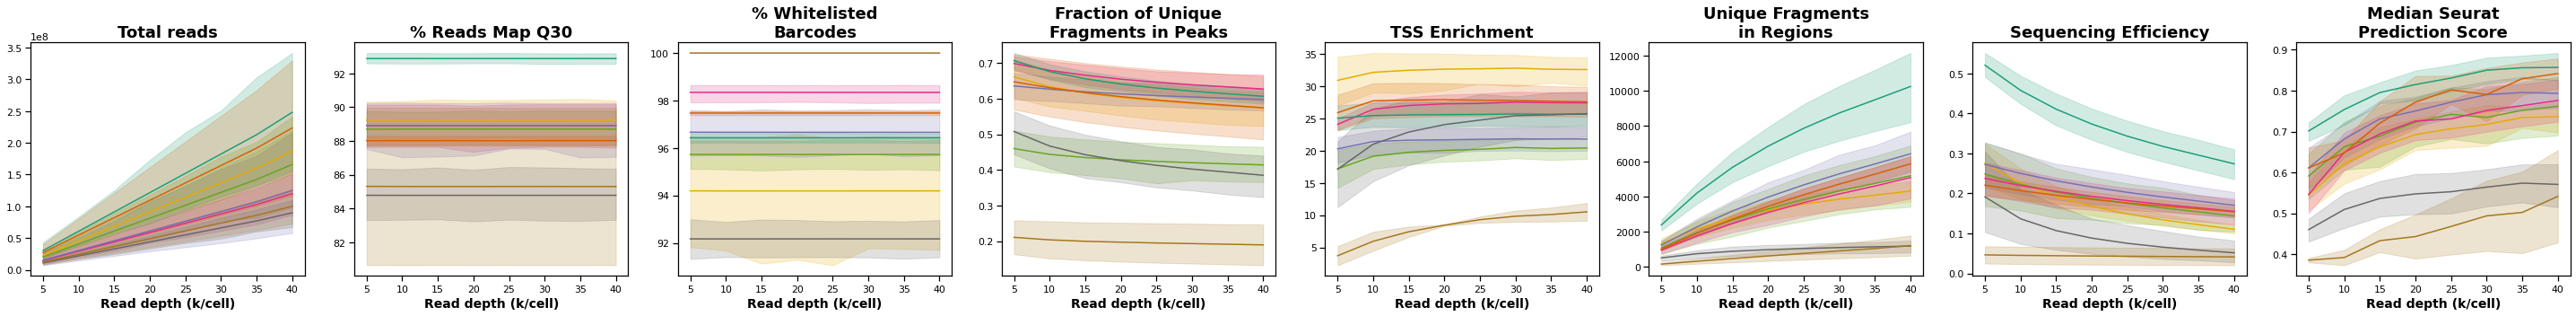

In [32]:
base_size = 5
n_cols = 8
n_rows = math.ceil(len(variables) / n_cols)
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(base_size * n_cols, base_size * n_rows)
)
fontsize_large = 18
for variable in variables:
    ax = axes.flatten()[variables.index(variable)]
    sns.lineplot(
        x="depth",
        y=variable,
        hue="tech",
        data=metadata_df_combined,
        ax=ax,
        palette=tech_color_palette,
    )
    # sns.scatterplot(x="depth", y=variable,hue="tech",data=metadata_df_combined, ax=axes[variables.index(variable)])
    ax.set_ylabel(None)
    ax.set_title(
        label=var_alias_dict[variable],
        fontdict={"fontsize": fontsize_large},
        fontweight="bold",
    )
    ax.get_legend().remove()
    ax.set_xlabel("Read depth (k/cell)", fontsize=14, fontweight="bold")


for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()
plt.rcParams["font.weight"] = "bold"
ax.get_legend()
plt.tight_layout()
plt.savefig("plts/all_variables.svg", dpi=600, facecolor="w", bbox_inches="tight")
plt.savefig("plts/all_variables.png", dpi=600, facecolor="w", bbox_inches="tight")

plt.show()

In [33]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xv11c": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "mtscatacfacs": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

In [34]:
variables = [
    "Unique_nr_frag_in_regions",
    "TSS_enrichment",
    "FRIP",
    "%_unique_nr_frag_in_regions_in_cells",
]

In [35]:
var_alias_dict = {
    "Log_total_nr_frag": "Total Fragments",
    "Log_unique_nr_frag": "Total Fragments",
    "Total_nr_frag": "Total Fragments",
    "Unique_nr_frag": "Unique Fragments",
    "Dupl_nr_frag": "Duplicate Fragments",
    "Dupl_rate": "% Duplicate Fragments",
    "Total_nr_frag_in_regions": "Total Fragments in Regions",
    "Unique_nr_frag_in_regions": "Unique Fragments\nin Regions",
    "FRIP": "Fraction of Unique\nFragments in Peaks",
    "TSS_enrichment": "TSS Enrichment",
    "sample_id": "Sample",
    "tech": "Technology",
    "n_reads": "Total reads",
    "%_q30": "% Reads Map Q30",
    "%_barcodes": "% Whitelisted\nBarcodes",
    "%_unique_nr_frag_in_regions_in_cells": "Sequencing Efficiency",
    "median_cell_type_pred_score": "Median Seurat\nPrediction Score",
}

In [36]:
metadata_df_combined["supersample"] = [
    x.split("__")[-1] for x in metadata_df_combined.index
]
metadata_df_combined["tech"] = [x.split("_")[3] for x in metadata_df_combined.index]

In [37]:
metadata_df_combined["supersample"] = [
    x.split("__")[-1] for x in metadata_df_combined.index
]
metadata_df_combined["dash"] = "no"
for supersample in metadata_df_combined["supersample"].unique():
    print(supersample)
    if supersample == "CNA_10xv11_4":
        tech = "10xv11c"
        metadata_df_combined.loc[
            metadata_df_combined["supersample"] == supersample, "tech"
        ] = tech
        metadata_df_combined.loc[
            metadata_df_combined["supersample"] == supersample, "dash"
        ] = "yes"
    if supersample == "CNA_10xv11_5":
        tech = "10xv11c"
        metadata_df_combined.loc[
            metadata_df_combined["supersample"] == supersample, "tech"
        ] = tech
        metadata_df_combined.loc[
            metadata_df_combined["supersample"] == supersample, "dash"
        ] = "yes"
    if supersample == "BRO_mtscatac_1":
        tech = "mtscatacfacs"
        metadata_df_combined.loc[
            metadata_df_combined["supersample"] == supersample, "tech"
        ] = tech
        metadata_df_combined.loc[
            metadata_df_combined["supersample"] == supersample, "dash"
        ] = "yes"
    if supersample == "BRO_mtscatac_2":
        tech = "mtscatacfacs"
        metadata_df_combined.loc[
            metadata_df_combined["supersample"] == supersample, "tech"
        ] = tech
        metadata_df_combined.loc[
            metadata_df_combined["supersample"] == supersample, "dash"
        ] = "yes"
    else:
        print("\t not")

BIO_ddseq_1
	 not
BIO_ddseq_2
	 not
BIO_ddseq_3
	 not
BIO_ddseq_4
	 not
BRO_mtscatac_1
	 not
BRO_mtscatac_2
CNA_10xmultiome_1
	 not
CNA_10xmultiome_2
	 not
CNA_10xv11_1
	 not
CNA_10xv11_2
	 not
CNA_10xv11_3
	 not
CNA_10xv11_4
	 not
CNA_10xv11_5
	 not
CNA_10xv2_1
	 not
CNA_10xv2_2
	 not
CNA_hydrop_1
	 not
CNA_hydrop_2
	 not
CNA_hydrop_3
	 not
CNA_mtscatac_1
	 not
CNA_mtscatac_2
	 not
EPF_hydrop_1
	 not
EPF_hydrop_2
	 not
EPF_hydrop_3
	 not
EPF_hydrop_4
	 not
HAR_ddseq_1
	 not
HAR_ddseq_2
	 not
MDC_mtscatac_1
	 not
MDC_mtscatac_2
	 not
OHS_s3atac_1
	 not
OHS_s3atac_2
	 not
SAN_10xmultiome_1
	 not
SAN_10xmultiome_2
	 not
STA_10xv11_1
	 not
STA_10xv11_2
	 not
TXG_10xv11_1
	 not
TXG_10xv2_1
	 not
TXG_10xv2_2
	 not
UCS_ddseq_1
	 not
UCS_ddseq_2
	 not
VIB_10xmultiome_1
	 not
VIB_10xmultiome_2
	 not
VIB_10xv1_1
	 not
VIB_10xv1_2
	 not
VIB_10xv2_1
	 not
VIB_10xv2_2
	 not
VIB_hydrop_1
	 not
VIB_hydrop_2
	 not


In [38]:
metadata_df_combined_simplified = (
    metadata_df_combined.groupby(["depth", "tech"]).median().reset_index()
)

In [39]:
metadata_df_combined_simplified

,depth,tech,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,Total_nr_frag_in_regions,Unique_nr_frag_in_regions,...,logfc__CD16+_monocyte,fc__CD16+_monocyte,logfc__CD4+_T_cell,fc__CD4+_T_cell,logfc__Cytotoxic_T_cell,fc__Cytotoxic_T_cell,logfc__Dendritic_cell,fc__Dendritic_cell,logfc__Natural_killer_cell,fc__Natural_killer_cell
0,5,10xmultiome,3.144116,3.127048,1424.00,1373.00,54.50,0.054597,978.75,935.75,...,1.535821,2.899534,1.124277,2.179923,0.849068,1.808537,1.191688,2.284198,0.802301,1.743880
1,5,10xv1,3.222325,3.205341,1669.00,1605.50,59.50,0.035450,1059.00,1018.50,...,1.459920,2.751474,1.792636,3.464526,1.365544,2.577220,1.247425,2.408203,1.645011,3.168196
2,5,10xv11,3.240376,3.196629,1742.25,1574.50,156.50,0.067212,1219.25,1094.50,...,1.781498,3.437844,2.287149,4.926473,1.807381,3.500063,1.731126,3.319868,1.828110,3.614297
3,5,10xv11c,3.479741,3.445468,3018.25,2789.25,208.50,0.067945,1907.25,1770.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,10xv2,3.606154,3.570781,4038.00,3722.25,331.00,0.079784,2687.75,2466.75,...,1.879416,3.679802,2.593376,6.035237,2.092808,4.266728,2.054543,4.155126,2.363095,5.147236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,40,ddseq,4.313589,3.880090,20591.25,7597.00,12801.50,0.626964,12641.50,4391.25,...,2.118625,4.415640,2.236236,4.731765,1.315427,2.488795,1.980295,3.945737,2.211719,4.632934
76,40,hydrop,4.132692,3.505828,13573.50,3205.00,10093.00,0.724729,4963.00,1467.00,...,1.500935,2.831509,1.624637,3.083646,1.391498,2.623509,1.271719,2.414491,1.100340,2.144053
77,40,mtscatac,4.190456,3.991375,15822.50,9859.50,5912.00,0.345301,5553.25,3497.25,...,2.203352,4.605482,2.942704,7.803160,2.940553,7.878725,2.165332,4.485696,2.540154,5.816511
78,40,mtscatacfacs,4.448699,4.201697,28099.50,15911.75,11826.25,0.421607,13402.00,7767.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
metadata_df_combined_simplified["dash"] = "no"
for tech in metadata_df_combined_simplified["tech"].unique():
    print(tech)
    if tech == "10xv11c":
        metadata_df_combined_simplified.loc[
            metadata_df_combined_simplified["tech"] == tech, "dash"
        ] = "yes"
    if tech == "mtscatacfacs":
        metadata_df_combined_simplified.loc[
            metadata_df_combined_simplified["tech"] == tech, "dash"
        ] = "yes"
    else:
        print("\t not")

10xmultiome
	 not
10xv1
	 not
10xv11
	 not
10xv11c
	 not
10xv2
	 not
ddseq
	 not
hydrop
	 not
mtscatac
	 not
mtscatacfacs
s3atac
	 not


In [41]:
tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 controls",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}

In [42]:
tech_order = [
    "10xv1",
    "10xv11",
    "10xv11c",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "mtscatacfacs",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_order = [tech_alias_dict[x] for x in tech_order]
tech_alias_color_palette = {
    tech_alias_dict[x]: y for x, y in tech_color_palette.items()
}

In [43]:
dashes = ["", "", "", (2, 1), "", "", "", "", (2, 1), ""]

In [44]:
metadata_df_combined_simplified["tech_alias"] = [
    tech_alias_dict[x] for x in metadata_df_combined_simplified["tech"]
]

In [45]:
metadata_df_combined["tech"].value_counts()

hydrop          72
ddseq           64
10xmultiome     48
10xv11          48
10xv2           48
mtscatac        32
mtscatacfacs    16
10xv11c         16
s3atac          16
10xv1           16
Name: tech, dtype: int64

In [46]:
list(metadata_df_combined_simplified["tech"])

['10xmultiome',
 '10xv1',
 '10xv11',
 '10xv11c',
 '10xv2',
 'ddseq',
 'hydrop',
 'mtscatac',
 'mtscatacfacs',
 's3atac',
 '10xmultiome',
 '10xv1',
 '10xv11',
 '10xv11c',
 '10xv2',
 'ddseq',
 'hydrop',
 'mtscatac',
 'mtscatacfacs',
 's3atac',
 '10xmultiome',
 '10xv1',
 '10xv11',
 '10xv11c',
 '10xv2',
 'ddseq',
 'hydrop',
 'mtscatac',
 'mtscatacfacs',
 's3atac',
 '10xmultiome',
 '10xv1',
 '10xv11',
 '10xv11c',
 '10xv2',
 'ddseq',
 'hydrop',
 'mtscatac',
 'mtscatacfacs',
 's3atac',
 '10xmultiome',
 '10xv1',
 '10xv11',
 '10xv11c',
 '10xv2',
 'ddseq',
 'hydrop',
 'mtscatac',
 'mtscatacfacs',
 's3atac',
 '10xmultiome',
 '10xv1',
 '10xv11',
 '10xv11c',
 '10xv2',
 'ddseq',
 'hydrop',
 'mtscatac',
 'mtscatacfacs',
 's3atac',
 '10xmultiome',
 '10xv1',
 '10xv11',
 '10xv11c',
 '10xv2',
 'ddseq',
 'hydrop',
 'mtscatac',
 'mtscatacfacs',
 's3atac',
 '10xmultiome',
 '10xv1',
 '10xv11',
 '10xv11c',
 '10xv2',
 'ddseq',
 'hydrop',
 'mtscatac',
 'mtscatacfacs',
 's3atac']

In [47]:
metadata_df_combined_simplified

,depth,tech,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,Total_nr_frag_in_regions,Unique_nr_frag_in_regions,...,logfc__CD4+_T_cell,fc__CD4+_T_cell,logfc__Cytotoxic_T_cell,fc__Cytotoxic_T_cell,logfc__Dendritic_cell,fc__Dendritic_cell,logfc__Natural_killer_cell,fc__Natural_killer_cell,dash,tech_alias
0,5,10xmultiome,3.144116,3.127048,1424.00,1373.00,54.50,0.054597,978.75,935.75,...,1.124277,2.179923,0.849068,1.808537,1.191688,2.284198,0.802301,1.743880,no,10x Multiome
1,5,10xv1,3.222325,3.205341,1669.00,1605.50,59.50,0.035450,1059.00,1018.50,...,1.792636,3.464526,1.365544,2.577220,1.247425,2.408203,1.645011,3.168196,no,10x v1
2,5,10xv11,3.240376,3.196629,1742.25,1574.50,156.50,0.067212,1219.25,1094.50,...,2.287149,4.926473,1.807381,3.500063,1.731126,3.319868,1.828110,3.614297,no,10x v1.1
3,5,10xv11c,3.479741,3.445468,3018.25,2789.25,208.50,0.067945,1907.25,1770.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,10x v1.1 controls
4,5,10xv2,3.606154,3.570781,4038.00,3722.25,331.00,0.079784,2687.75,2466.75,...,2.593376,6.035237,2.092808,4.266728,2.054543,4.155126,2.363095,5.147236,no,10x v2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,40,ddseq,4.313589,3.880090,20591.25,7597.00,12801.50,0.626964,12641.50,4391.25,...,2.236236,4.731765,1.315427,2.488795,1.980295,3.945737,2.211719,4.632934,no,Bio-Rad ddSEQ SureCell
76,40,hydrop,4.132692,3.505828,13573.50,3205.00,10093.00,0.724729,4963.00,1467.00,...,1.624637,3.083646,1.391498,2.623509,1.271719,2.414491,1.100340,2.144053,no,HyDrop
77,40,mtscatac,4.190456,3.991375,15822.50,9859.50,5912.00,0.345301,5553.25,3497.25,...,2.942704,7.803160,2.940553,7.878725,2.165332,4.485696,2.540154,5.816511,no,mtscATAC-seq
78,40,mtscatacfacs,4.448699,4.201697,28099.50,15911.75,11826.25,0.421607,13402.00,7767.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,mtscATAC-seq (FACS)


In [48]:
variables = [
    "%_q30",
    "%_barcodes",
    "FRIP",
    "TSS_enrichment",
    "Unique_nr_frag_in_regions",
    "%_unique_nr_frag_in_regions_in_cells",
    "median_cell_type_pred_score",
    "fc__B_cell",
    "fc__Dendritic_cell",
    "n_dars__B_cell",
    "n_dars__Dendritic_cell",
]

In [49]:
var_alias_dict["fc__B_cell"] = "B Cell DARs\n(fold-change)"
var_alias_dict["n_dars__B_cell"] = "B Cell n DARs\n(x1000)"
var_alias_dict["fc__Dendritic_cell"] = "Dendritic Cell DARs\n(fold-change)"
var_alias_dict["n_dars__Dendritic_cell"] = "Dendritic Cell n DARs\n(x1000)"

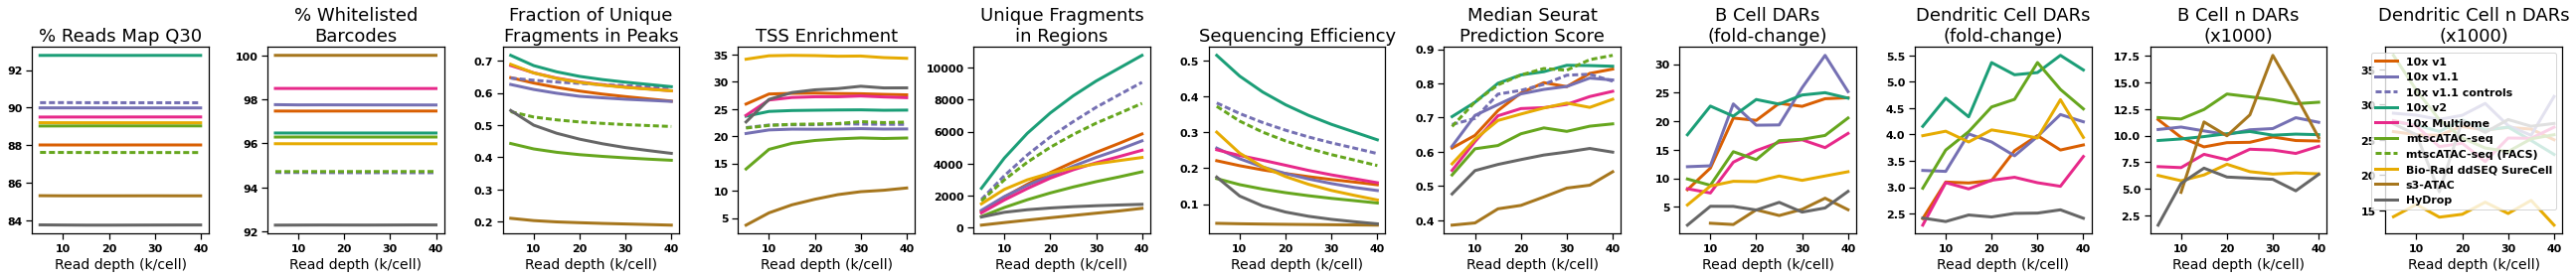

In [50]:
base_size = 4
# n_cols = 4
n_cols = len(variables)
n_rows = math.ceil(len(variables) / n_cols)
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(base_size * (n_cols - 2), base_size * n_rows)
)
fontsize_large = 18
for variable in variables:
    ax = axes.flatten()[variables.index(variable)]
    sns.lineplot(
        x="depth",
        y=variable,
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes,
        data=metadata_df_combined_simplified,
        ax=ax,
        palette=tech_alias_color_palette,
        # err_style="bars",
        # errorbar="ci",
        linewidth=3,
    )
    # sns.scatterplot(x="depth", y=variable,hue="tech",data=metadata_df_combined, ax=axes[variables.index(variable)])
    ax.set_ylabel(None)
    ax.set_title(
        label=var_alias_dict[variable],
        fontdict={"fontsize": fontsize_large},
        # fontweight="bold",
    )

    if variable != variables[-1]:
        ax.get_legend().remove()

    if variable == variables[-1]:

        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)

        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_order),
        #     handleheight=3,
        # )

    ax.set_xlabel("Read depth (k/cell)", fontsize=14)

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

# plt.rcParams["font.weight"] = "bold"
ax.get_legend()
plt.tight_layout()
plt.savefig("plts/important_variables.svg", dpi=600, facecolor="w")
plt.savefig("plts/important_variables.png", dpi=600, facecolor="w")

plt.show()

In [51]:
metadata_df_combined_simplified

,depth,tech,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,Total_nr_frag_in_regions,Unique_nr_frag_in_regions,...,logfc__CD4+_T_cell,fc__CD4+_T_cell,logfc__Cytotoxic_T_cell,fc__Cytotoxic_T_cell,logfc__Dendritic_cell,fc__Dendritic_cell,logfc__Natural_killer_cell,fc__Natural_killer_cell,dash,tech_alias
0,5,10xmultiome,3.144116,3.127048,1424.00,1373.00,54.50,0.054597,978.75,935.75,...,1.124277,2.179923,0.849068,1.808537,1.191688,2.284198,0.802301,1.743880,no,10x Multiome
1,5,10xv1,3.222325,3.205341,1669.00,1605.50,59.50,0.035450,1059.00,1018.50,...,1.792636,3.464526,1.365544,2.577220,1.247425,2.408203,1.645011,3.168196,no,10x v1
2,5,10xv11,3.240376,3.196629,1742.25,1574.50,156.50,0.067212,1219.25,1094.50,...,2.287149,4.926473,1.807381,3.500063,1.731126,3.319868,1.828110,3.614297,no,10x v1.1
3,5,10xv11c,3.479741,3.445468,3018.25,2789.25,208.50,0.067945,1907.25,1770.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,10x v1.1 controls
4,5,10xv2,3.606154,3.570781,4038.00,3722.25,331.00,0.079784,2687.75,2466.75,...,2.593376,6.035237,2.092808,4.266728,2.054543,4.155126,2.363095,5.147236,no,10x v2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,40,ddseq,4.313589,3.880090,20591.25,7597.00,12801.50,0.626964,12641.50,4391.25,...,2.236236,4.731765,1.315427,2.488795,1.980295,3.945737,2.211719,4.632934,no,Bio-Rad ddSEQ SureCell
76,40,hydrop,4.132692,3.505828,13573.50,3205.00,10093.00,0.724729,4963.00,1467.00,...,1.624637,3.083646,1.391498,2.623509,1.271719,2.414491,1.100340,2.144053,no,HyDrop
77,40,mtscatac,4.190456,3.991375,15822.50,9859.50,5912.00,0.345301,5553.25,3497.25,...,2.942704,7.803160,2.940553,7.878725,2.165332,4.485696,2.540154,5.816511,no,mtscATAC-seq
78,40,mtscatacfacs,4.448699,4.201697,28099.50,15911.75,11826.25,0.421607,13402.00,7767.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,mtscATAC-seq (FACS)


In [57]:
metadata_df_combined_simplified.columns

Index(['depth', 'tech', 'Log_total_nr_frag', 'Log_unique_nr_frag',
       'Total_nr_frag', 'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'n_reads', 'total_bc_found', '%_barcodes',
       'n_reads_into_bwa', 'n_reads_q30', '%_q30',
       'Total_unique_nr_frag_in_regions_in_cells',
       '%_unique_nr_frag_in_regions_in_cells', 'median_cell_type_pred_score',
       'n_dars__B_cell', 'n_dars__CD14+_monocyte', 'n_dars__CD16+_monocyte',
       'n_dars__CD4+_T_cell', 'n_dars__Cytotoxic_T_cell',
       'n_dars__Dendritic_cell', 'n_dars__Natural_killer_cell',
       'logfc__B_cell', 'fc__B_cell', 'logfc__CD14+_monocyte',
       'fc__CD14+_monocyte', 'logfc__CD16+_monocyte', 'fc__CD16+_monocyte',
       'logfc__CD4+_T_cell', 'fc__CD4+_T_cell', 'logfc__Cytotoxic_T_cell',
       'fc__Cytotoxic_T_cell', 'logfc__Dendritic_cell', 'fc__Dendritic_cell',
       'logfc__Natural_killer_cell', 'fc__Natural_k

In [58]:
variables_sub = [
    "depth",
    "tech",
    "TSS_enrichment",
    "Unique_nr_frag_in_regions",
    "%_unique_nr_frag_in_regions_in_cells",
    "median_cell_type_pred_score",
    "fc__B_cell",
]

In [60]:
metadata_df_combined_simplified[variables_sub].to_csv("derop_fig2a-e.csv")